In [1]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("./data/bank-additional-full.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
# 머신러닝에서 input변수를 카테고리형으로 넣으면 해석을 하지못함 -> 수치형으로 바꿔주는 원핫인코딩 수행
data = pd.get_dummies(data, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [24]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [25]:
data['y'] = np.where( data['y'] == 'no', 0, 1)

In [26]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [31]:
# data.columns
input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

In [32]:
# Xgboost 학습시키기 (분류형이 아닌 회귀형으로)

from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1)

In [33]:
xgb.fit(data[input_var], data['y'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [35]:
# Shap Value 활용하기
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.5/436.5 kB 3.7 MB/s eta 0:00:00a 0:00:01


In [36]:
import shap

In [37]:
explainer = shap.TreeExplainer(xgb)

In [39]:
#변수 중요도
shap_values = explainer.shap_values( data[input_var]) # shap values(각 변수가 예측값에 미치는 영향력) 계산
shap_values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


array([[-0.00128595, -0.02324178,  0.00421535, ...,  0.00149483,
         0.        , -0.00084469],
       [-0.0018292 , -0.05043375,  0.00356331, ...,  0.0015798 ,
         0.        , -0.00076527],
       [-0.00295462, -0.024808  ,  0.00349362, ...,  0.00155784,
         0.        , -0.00074613],
       ...,
       [-0.03701343, -0.10001991,  0.00819035, ...,  0.00859921,
         0.        , -0.00891716],
       [ 0.01436747,  0.2625685 ,  0.02810661, ...,  0.01103162,
         0.        , -0.00671462],
       [ 0.04284789,  0.01293764, -0.02135742, ..., -0.06203156,
         0.        , -0.00796557]], dtype=float32)

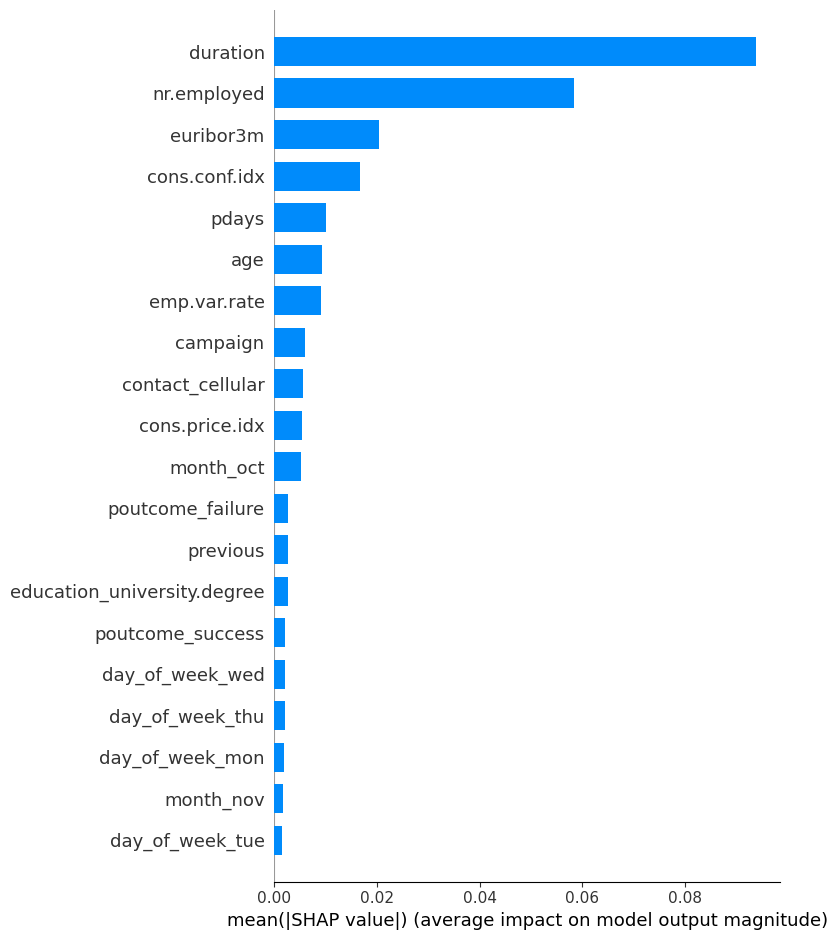

In [40]:
#shape.summary_plot( shap values, input variables, plot_type)
shap.summary_plot(shap_values, data[input_var], plot_type="bar") # shap values를 절대값으로 중요도 파악

In [ ]:
# dependence plot -> 해석 : y축 값 0을 기준으로 위로가면 좋은 영향력, 아래로가면 안좋은 영향력을 의미
# shap.dependence_plot('변수명', shap values, input variables)

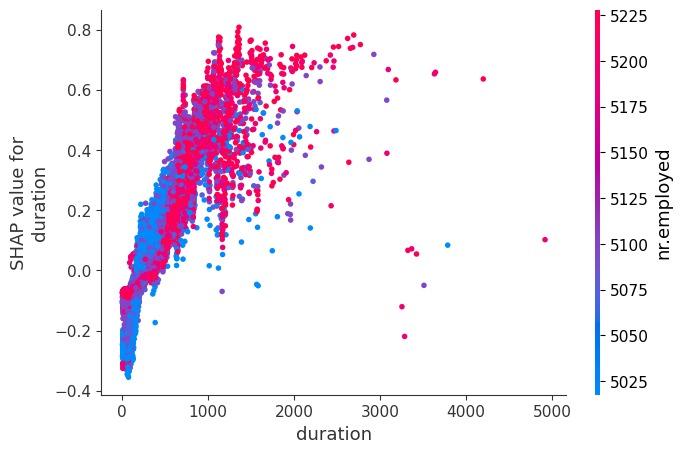

In [41]:
shap.dependence_plot('duration', shap_values, data[input_var])

In [42]:
#'duration'이 100~200 전에는 타겟값이 0일가능성이 높지만, 그 이후에는 점점 더 1일 가능성이 높다

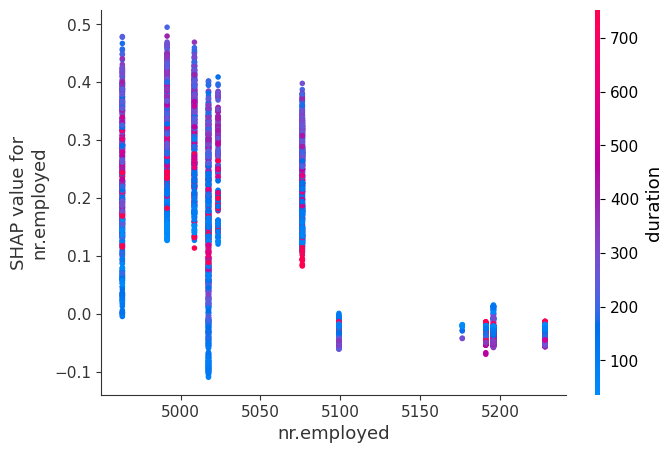

In [43]:
shap.dependence_plot('nr.employed', shap_values, data[input_var])

In [44]:
#'nr.employed'가 5000보다 높을 때는 타겟값이 0일 가능성이 크고, 5000보다 작을때는 타겟값이 1일 가능성이 크다.

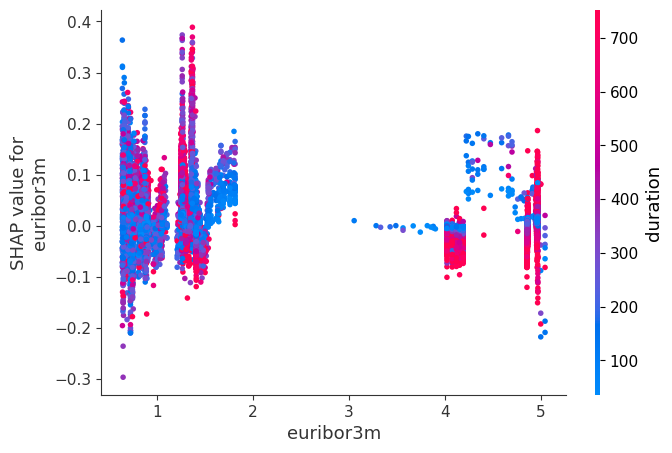

In [45]:
shap.dependence_plot('euribor3m', shap_values, data[input_var])

In [46]:
# 'euribor3m'이 1.5와 2사이 또는 4와 5사이에서는 타겟값이 1일 가능성이 크다

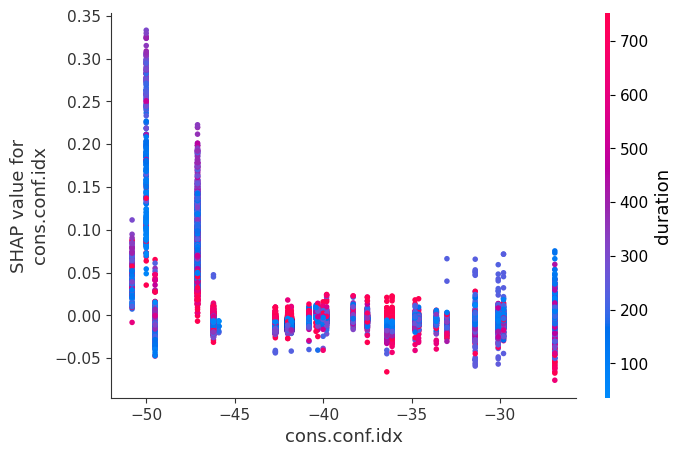

In [47]:
shap.dependence_plot('cons.conf.idx', shap_values, data[input_var])

In [ ]:
# 'cons.conf.idx'가 작으면 작을수록 타겟값이 1일 가능성이 높아진다.

In [48]:
# force plot
data['pred'] = xgb.predict(data[input_var])
data['pred']

0        0.000357
1       -0.001140
2        0.000747
3       -0.000208
4        0.002844
           ...   
41183    0.882677
41184    0.342715
41185    0.092818
41186    0.964269
41187    0.093736
Name: pred, Length: 41188, dtype: float32

In [52]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[41186], data[input_var].iloc[41186])

In [50]:
# 까만색 숫자 : 예측된 값
# 빨간색 화살표와 변수명=숫자 : 0.96이라는 수치(예측치)가 커지는 데 기여했다는 의미
# 파란색 화살표와 변수명=숫자 : 예측치가 작아지는 데 기여 

In [51]:
# shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], data[input_var].iloc[0])